# Data Cleaning

In [1]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as plt
import seaborn as sns

In [3]:
# loading data
df = pd.read_csv("Disease.csv" , sep=';')
del df['ind']
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160.0,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144.0,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118.0,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170.0,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134.0,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


### 1. Dealing with missing values

In [4]:
missing_count = df.isnull().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'missing count:' : missing_count ,
                                 'missing percent': percent_missing})
missing_value_df

,missing count:,missing percent
sbp,1,0.21645
tobacco,0,0.00000
ldl,0,0.00000
adiposity,1,0.21645
famhist,0,0.00000
typea,0,0.00000
obesity,0,0.00000
alcohol,1,0.21645
age,0,0.00000
chd,0,0.00000


In [5]:
df = df.dropna(axis=0)

In [6]:
df.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

### 2. Dealing with Irregular Data (Outliers)

In [7]:
#sbp
df["sbp"] = df["sbp"].map(
    lambda x: 184.0 if x > 184.0 else x
)

In [8]:
#tobacco
df["tobacco"] = df["tobacco"].map(
    lambda x: 13.67125 if x > 13.67125 else x
)

In [9]:
#LDL
df["ldl"] = df["ldl"].map(
    lambda x: 9.55125 if x > 9.55125 else x
)

In [10]:
#typea
df["typea"] = df["typea"].map(
    lambda x: 27.5 if x < 27.5 else x
)

In [11]:
#obesity
df["obesity"] = df["obesity"].map(
    lambda x: 36.76625 if x > 36.76625 else x
)

df["obesity"] = df["obesity"].map(
    lambda x: 14.71625 if x < 14.71625 else x
)

In [12]:
#alcohol
df["alcohol"] = df["alcohol"].map(
    lambda x: 59.16 if x > 59.16 else x
)

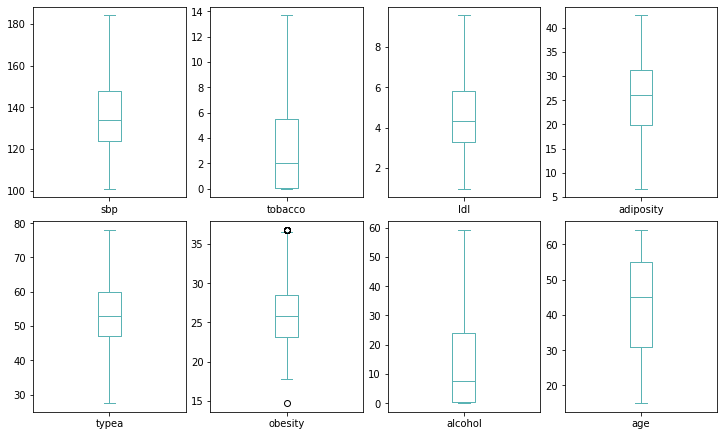

In [13]:
fig = plt.figure(figsize =(10, 7))

plt.subplot(241)
df['sbp'].plot.box(figsize=(10,6), color ='#5ab3b4' )
plt.tight_layout(pad=0.5)
plt.subplot(242)
df['tobacco'].plot.box( color ='#5ab3b4')
plt.tight_layout(pad=0.5)
plt.subplot(243)
df['ldl'].plot.box(color ='#5ab3b4')
plt.tight_layout(pad=0.5)
plt.subplot(244)
df['adiposity'].plot.box(color ='#5ab3b4')
plt.tight_layout(pad=0.5)

plt.subplot(245)
df['typea'].plot.box(color ='#5ab3b4')
plt.tight_layout(pad=0.5)
plt.subplot(246)
df['obesity'].plot.box(color ='#5ab3b4')
plt.tight_layout(pad=0.5)
plt.subplot(247)
df['alcohol'].plot.box(color ='#5ab3b4')
plt.tight_layout(pad=0.5)
plt.subplot(248)
df['age'].plot.box(color ='#5ab3b4')
plt.tight_layout(pad=0.5)

In [14]:
df.to_csv('cleaned_disease.csv',index=False)